## MiniVGGNet Architecture

INPUT => [(CONV => RELU => BN)*2 =>  POOL => DO]*2 => FC => RELU => BN => DO => FC

In [3]:
import matplotlib
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from ndl.nn.conv import MiniVGGNet
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set()

In [4]:
# load the training and testing data, then scale it into the
# range [0, 1]
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

[INFO] loading CIFAR-10 data...


In [5]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [6]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [7]:
epochs = 40

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01, decay=0.01 / epochs, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [8]:
# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=epochs, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 13s 259us/step - loss: 1.5790 - acc: 0.4713 - val_loss: 1.2293 - val_acc: 0.5836
Epoch 2/40
50000/50000 [==============================] - 12s 232us/step - loss: 1.0958 - acc: 0.6194 - val_loss: 0.9040 - val_acc: 0.6858
Epoch 3/40
50000/50000 [==============================] - 12s 232us/step - loss: 0.9279 - acc: 0.6749 - val_loss: 0.8411 - val_acc: 0.7126
Epoch 4/40
50000/50000 [==============================] - 11s 228us/step - loss: 0.8304 - acc: 0.7106 - val_loss: 0.7336 - val_acc: 0.7438
Epoch 5/40
50000/50000 [==============================] - 11s 230us/step - loss: 0.7605 - acc: 0.7343 - val_loss: 0.7161 - val_acc: 0.7478
Epoch 6/40
50000/50000 [==============================] - 12s 231us/step - loss: 0.7146 - acc: 0.7482 - val_loss: 0.7735 - val_acc: 0.7304
Epoch 7/40
50000/50000 [==============================] - 12s 231us/step - loss: 0.6710 -

[INFO] evaluating network...
             precision    recall  f1-score   support

   airplane       0.88      0.82      0.85      1000
 automobile       0.91      0.91      0.91      1000
       bird       0.76      0.71      0.74      1000
        cat       0.67      0.63      0.65      1000
       deer       0.79      0.84      0.81      1000
        dog       0.72      0.76      0.74      1000
       frog       0.84      0.88      0.86      1000
      horse       0.88      0.87      0.87      1000
       ship       0.90      0.91      0.90      1000
      truck       0.87      0.90      0.88      1000

avg / total       0.82      0.82      0.82     10000



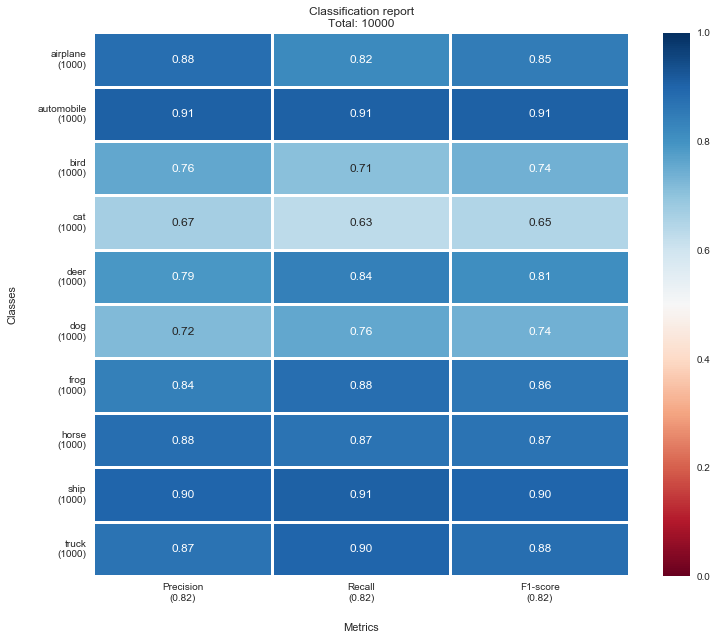

In [9]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
c_report = classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)
print(c_report)

from ndl.utils.plot import plotClassificationReport, plotKerasReport
plotClassificationReport(c_report)

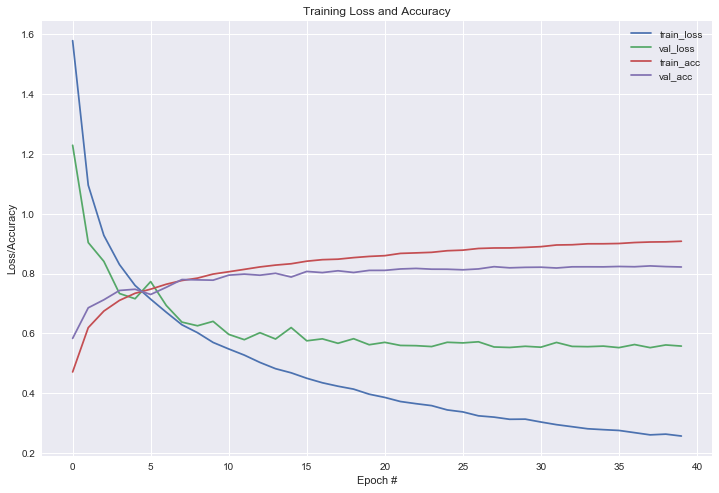

In [10]:
plotKerasReport(H, epochs)

We got **83% accuracy** which is substantially higher that we got with the ShallowNet implementation. This shows that deeper architectures are able to learn a richer set of features.

**To see the effects of Batch Normalization let's try re-training our network with BN turned off**

In [14]:
epochs = 60

## Trying this without batch normalization
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10, use_bn=False)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=epochs, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 9s 184us/step - loss: 2.2144 - acc: 0.1630 - val_loss: 2.0091 - val_acc: 0.2888
Epoch 2/60
50000/50000 [==============================] - 9s 180us/step - loss: 1.9902 - acc: 0.2739 - val_loss: 1.8872 - val_acc: 0.3337
Epoch 3/60
50000/50000 [==============================] - 9s 176us/step - loss: 1.8834 - acc: 0.3211 - val_loss: 1.7661 - val_acc: 0.3790
Epoch 4/60
50000/50000 [==============================] - 9s 179us/step - loss: 1.7705 - acc: 0.3628 - val_loss: 1.6349 - val_acc: 0.4173
Epoch 5/60
50000/50000 [==============================] - 9s 180us/step - loss: 1.6711 - acc: 0.3954 - val_loss: 1.5611 - val_acc: 0.4363
Epoch 6/60
50000/50000 [==============================] - 9s 180us/step - loss: 1.6008 - acc: 0.4226 - val_loss: 1.4908 - val_acc: 0.4658
Epoch 7/60
50000/50000 [==============================] - 9s 180us/step - loss: 1.5501 - acc: 0

50000/50000 [==============================] - 9s 178us/step - loss: 0.7643 - acc: 0.7297 - val_loss: 0.7473 - val_acc: 0.7364
Epoch 60/60
50000/50000 [==============================] - 9s 179us/step - loss: 0.7588 - acc: 0.7331 - val_loss: 0.7412 - val_acc: 0.7389


[INFO] evaluating network...
             precision    recall  f1-score   support

   airplane       0.80      0.74      0.77      1000
 automobile       0.86      0.87      0.86      1000
       bird       0.68      0.58      0.62      1000
        cat       0.56      0.53      0.54      1000
       deer       0.66      0.71      0.68      1000
        dog       0.65      0.61      0.63      1000
       frog       0.74      0.85      0.79      1000
      horse       0.79      0.79      0.79      1000
       ship       0.84      0.85      0.85      1000
      truck       0.79      0.85      0.82      1000

avg / total       0.74      0.74      0.74     10000



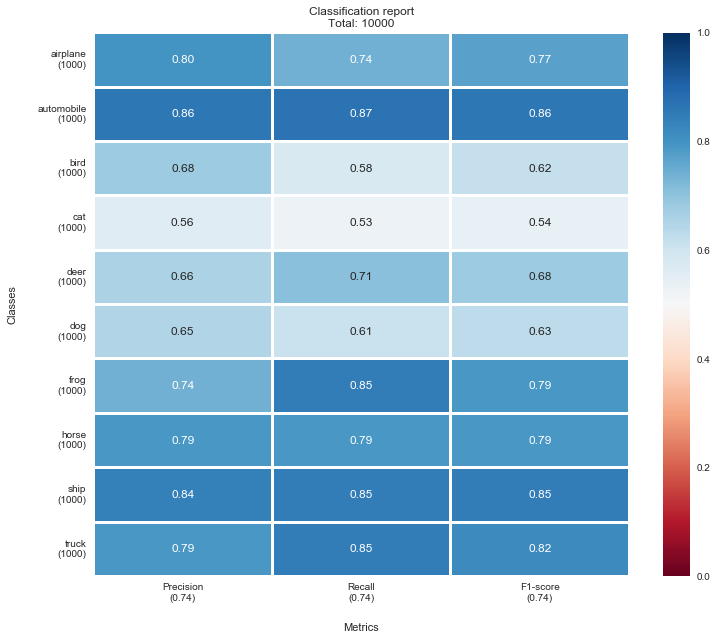

In [15]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
c_report = classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)
print(c_report)

from ndl.utils.plot import plotClassificationReport, plotKerasReport
plotClassificationReport(c_report)

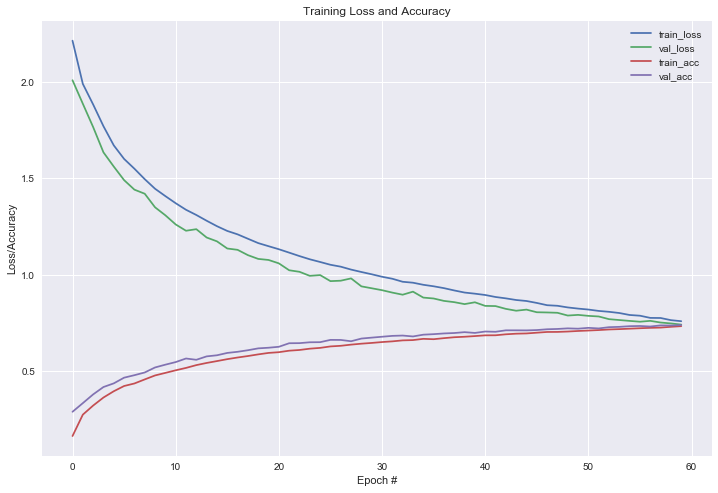

In [16]:
plotKerasReport(H, epochs)

**Some notes on Batch Normalization:**

- Training is faster without it (9s epochs vs 12s epochs)
- Convergence happens faster and we reach higher levels of accuracy with less epochs
- Very used to combat overfitting although we don't see this in this particular dataset
- We don't seem to have plateued yet although we increased the number of epochs to 60. We could potentially reach the same accuracy by increasing either increasing the epochs or slightly tuning the learning rate.